In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor as flr
import spectral_analysis as sa

# SPIDER - interfering pulse with its sheared copy

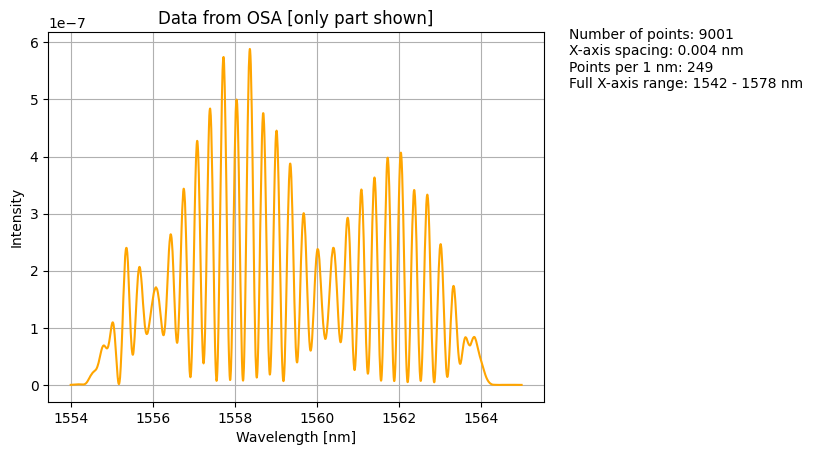

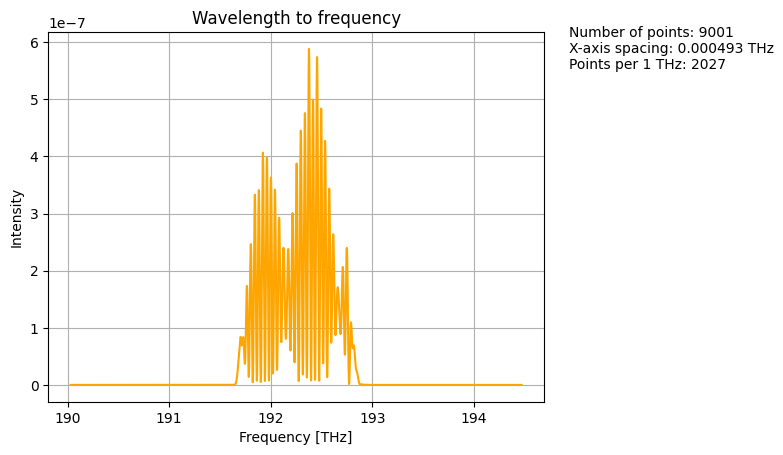

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


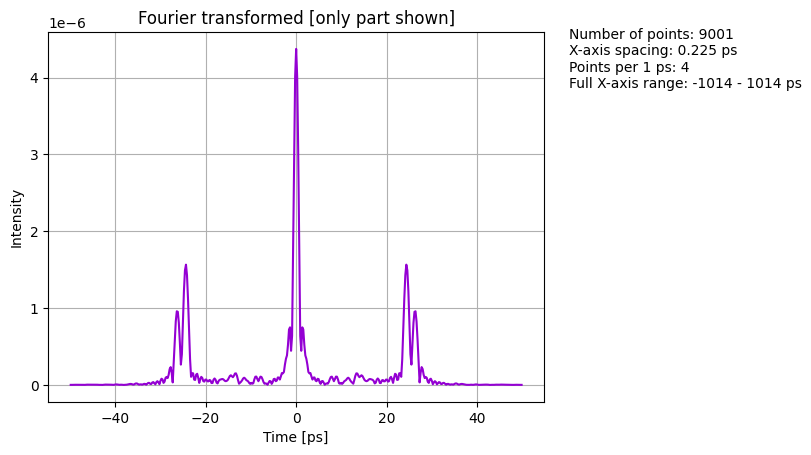

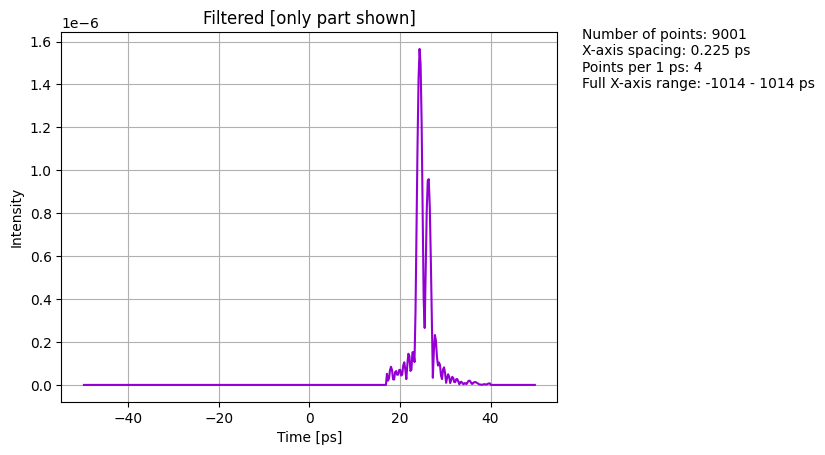

(-24.779543626758578-0j)


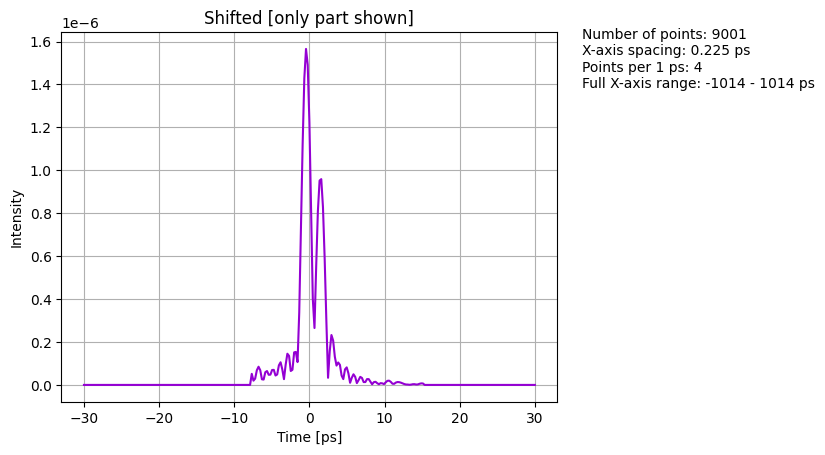

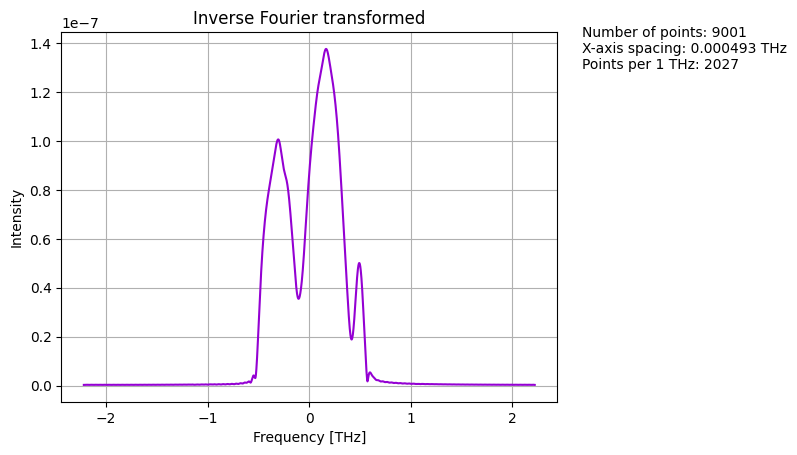

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


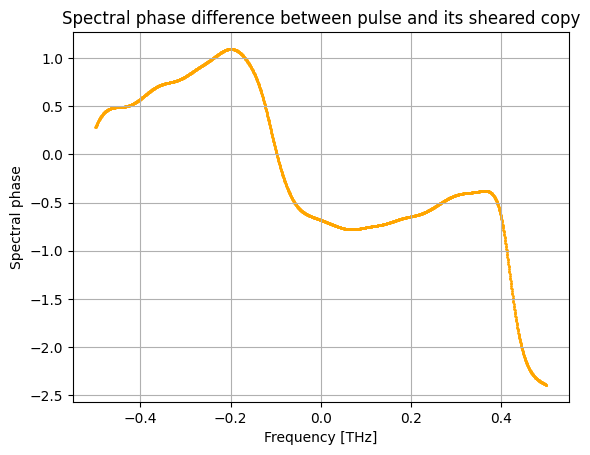

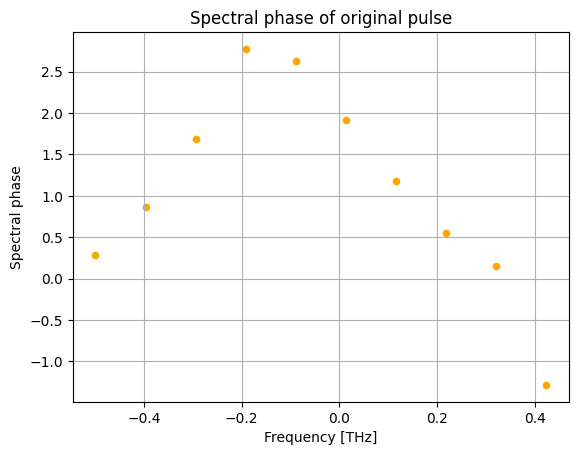

In [10]:
# load data

spectrum = pd.read_table("pajak.dat", skiprows = 2)
spectrum = sa.zero_padding(spectrum, 1)
sa.plot(spectrum, "orange", title = "Data from OSA", min =  1554, max = 1565, type = "wl")

# transform X-axis to frequency

s_freq = sa.wl_to_freq(spectrum)
s_freq = sa.constant_spacing(s_freq)
sa.plot(s_freq,"orange", title = "Wavelength to frequency", type = "freq")

shear = 0.103 # which corresponds to 0.84 nm shear
integrate_interval = flr(shear/(np.mean(np.diff(s_freq.values[:, 0]))))

# fourier transform

s_ft = sa.fourier(s_freq, absolute = False)
sa.plot(s_ft, title ="Fourier transformed", type = "time", min = -50, max = 50)

# filter one peak

s_ft = sa.replace_with_zeros(s_ft, start = "min", end = 17)
s_ft = sa.replace_with_zeros(s_ft, start = 40, end = "max")
sa.plot(s_ft, title = "Filtered", type = "time", min = -50, max = 50)

# shift to zero

sum = 0
all = np.sum(np.abs(s_ft.values[:, 1]))
for i in range(len(s_ft.values[:, 0])):
    sum += np.abs(s_ft.values[i, 1])
    if sum >= all/2:
        shift = -s_ft.values[i, 0]
        break
print(shift)
#shift = -24.5
s_shift = sa.smart_shift(s_ft, shift)
sa.plot(s_shift, title = "Shifted", type = "time", min = -30, max = 30)

# inverse fourier

s_ift = sa.inv_fourier(s_shift)
sa.plot(s_ift, title = "Inverse Fourier transformed", type = "freq")

# phase extraction

values = s_ift.values[:, 1].copy()
X = s_ift.values[:, 0].copy()

values = np.angle(values)

# prepare data to plot

start = -0.5
end = 0.5

s = np.searchsorted(X, start)
e = np.searchsorted(X, end)

X = X[s:e]
values = values[s:e]

# plot it

plt.scatter(X, values, color = "orange", s = 1)
plt.title("Spectral phase difference between pulse and its sheared copy")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()

values = np.unwrap(values)
X = X[::integrate_interval]
values = values[::integrate_interval]

plt.scatter(X, np.cumsum(values), color = "orange", s = 20)
plt.title("Spectral phase of original pulse")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()

# SPIDER SIMULATION

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


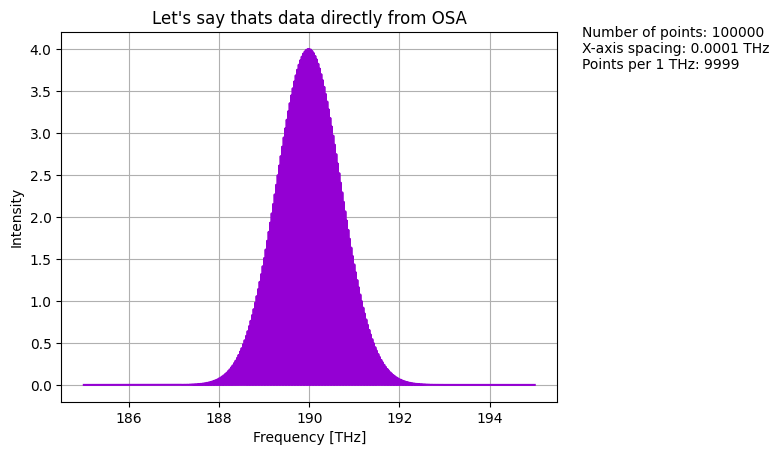

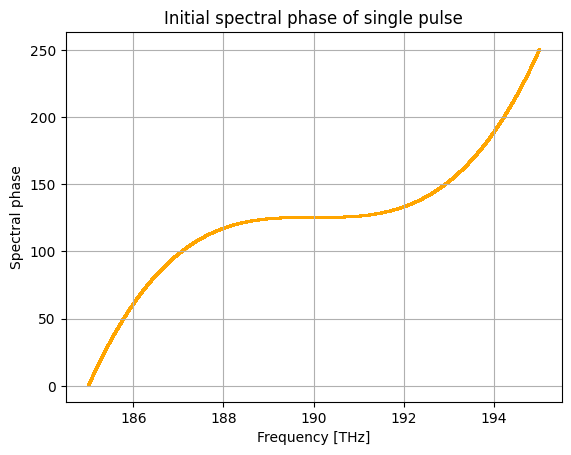

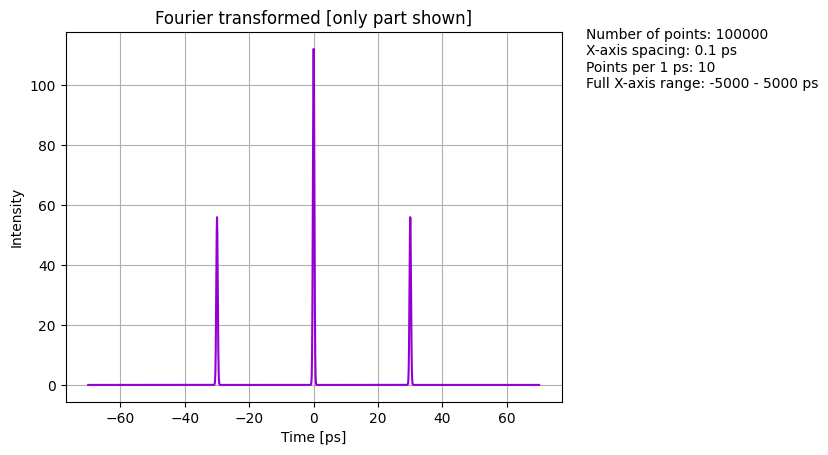

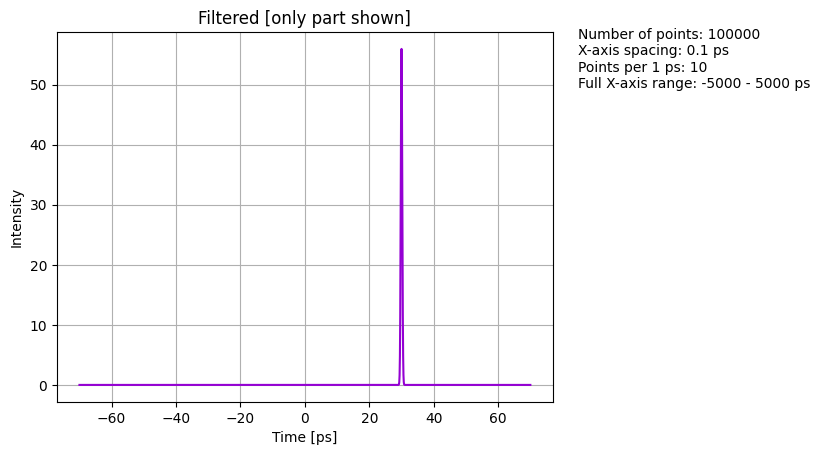

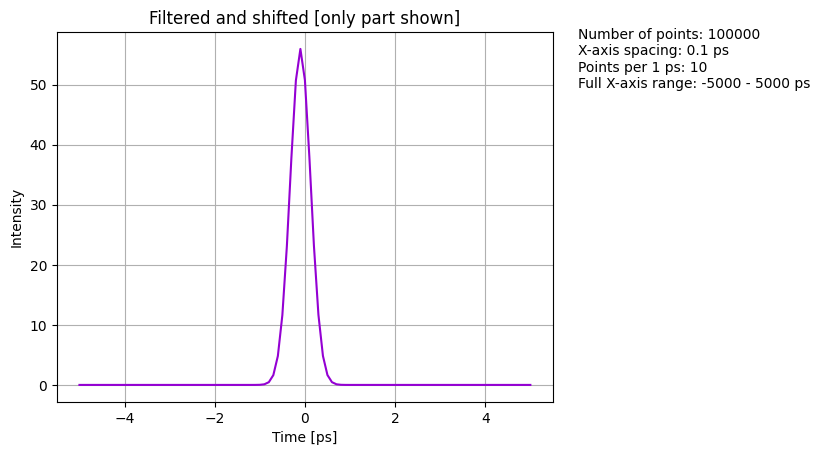

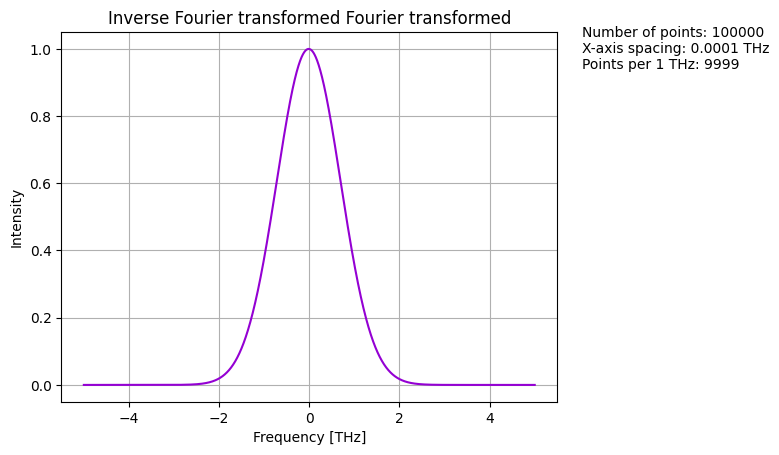

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


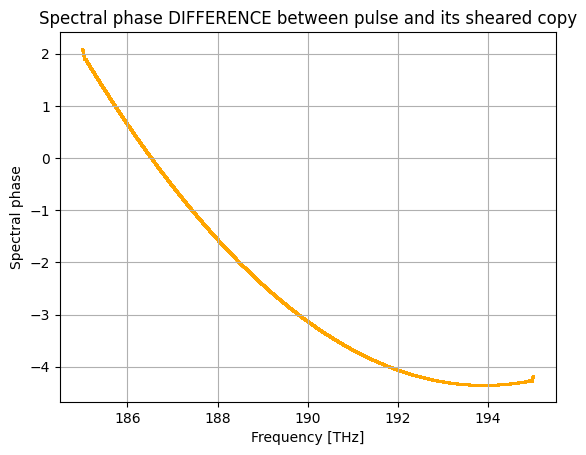

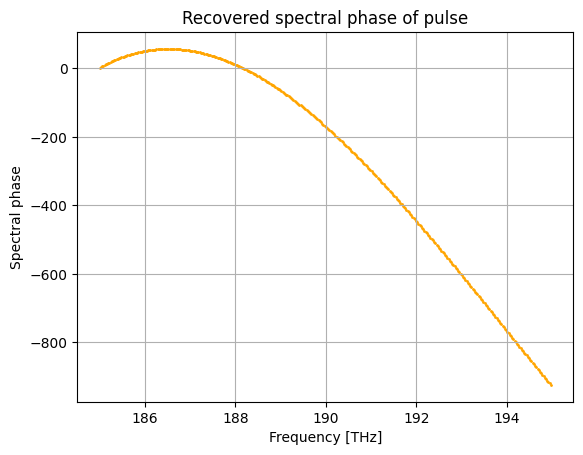

In [17]:
# normal distribution and pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

def phase(omega, mu):
    return (omega-mu)**3

def pulse(omega, mu, sig, boost = 1):
    return gaussian(omega, mu, sig)*np.exp(1j*phase(omega, mu))

pulse = np.vectorize(pulse)

# fabricate data

mean = 190
sd = 1

time_delay = 30
shear = 1/75 * 2 # shear 0.1 nm

line = np.linspace(185, 195, 100000)

integrate_interval = flr(shear/(line[1]-line[0]))

y = pulse(line + shear, mean, sd)*np.exp(1j*time_delay*line*2*np.pi) + pulse(line, mean, sd)
y = y * np.conjugate(y)
spectrum = pd.DataFrame(np.transpose(np.stack([line, y])))
sa.plot(spectrum, type = "freq", title = "Let's say thats data directly from OSA")

init_phase = np.angle(pulse(line, mean, sd))

plt.scatter(line, np.unwrap(init_phase), color = "orange", s = 1)
plt.title("Initial spectral phase of single pulse")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()

# fourier

s_ft = sa.fourier(spectrum, absolute = False)
sa.plot(s_ft, title ="Fourier transformed", type = "time", min = -70, max = 70)

# heaviside

s_ft = sa.replace_with_zeros(s_ft, start = "min", end = 15)
s_ft = sa.replace_with_zeros(s_ft, start = 45, end = "max")
sa.plot(s_ft, title = "Filtered", type = "time", min = -70, max = 70)

# shift
shift = "center"
s_shift = sa.smart_shift(s_ft, shift)
sa.plot(s_shift, title = "Filtered and shifted", type = "time", min = -5, max = 5)

# inverse fourier

s_ift = sa.inv_fourier(s_shift)
sa.plot(s_ift, title = "Inverse Fourier transformed Fourier transformed", type = "freq")

# extract phase

values = s_ift.values[:, 1].copy()
X = spectrum.values[:, 0].copy()
values = np.angle(values)
values = np.unwrap(values)

plt.scatter(X, values, color = "orange", s = 1)
plt.title("Spectral phase DIFFERENCE between pulse and its sheared copy")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()

X = X[::integrate_interval]
values = values[::integrate_interval]

plt.scatter(X, np.cumsum(values), color = "orange", s = 1)
plt.title("Recovered spectral phase of pulse")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()

# Pics for presentation

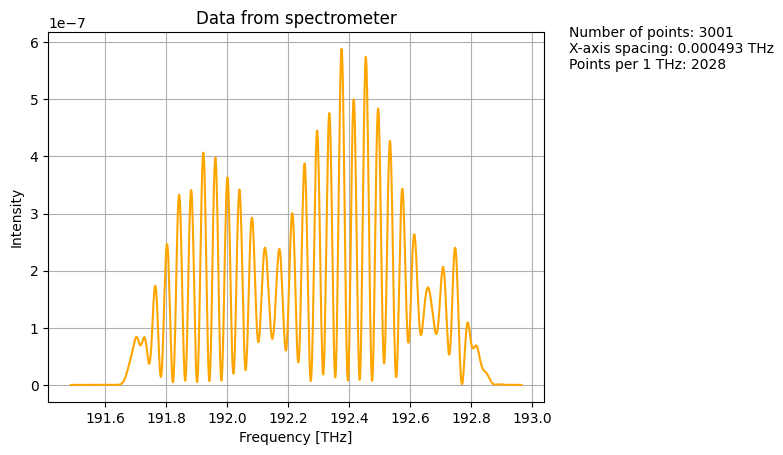

TypeError: fourier() got an unexpected keyword argument 'fourier_shift'

In [12]:
spectrum = pd.read_table("pajak.dat", skiprows = 2)

s_freq = sa.wl_to_freq(spectrum)
s_freq = sa.constant_spacing(s_freq)

sa.plot(s_freq,"orange", title = "Data from spectrometer", type = "freq")
s_ft = sa.fourier(s_freq, absolute = False, fourier_shift = True)
sa.plot(s_ft, title ="Fourier transformed", type = "time", min = -50, max = 50)

s_ft = sa.replace_with_zeros(s_ft, start = "min", end = 19)
s_ft = sa.replace_with_zeros(s_ft, start = 40, end = "max")
sa.plot(s_ft, title = "Filtered", type = "time", min = -50, max = 50)
s_shift = sa.smart_shift(s_ft, -24)
sa.plot(s_shift, title = "Shifted", type = "time", min = -50, max = 50)

s_ift = sa.inv_fourier(s_shift, fourier_shift = True)
s_c = s_ift.copy()
s_c = sa.shift(s_c, 192.2)
sa.plot(s_c, title = "Inverse Fourier", type = "freq", color = "orange")
values = s_ift.values[:, 1].copy()

values = np.log(values)
values = np.imag(values)

start = 191.8
end = 193

X = s_freq.values[:, 0].copy()
s = np.searchsorted(X, start)
e = np.searchsorted(X, end)
X = X[s:e:2]
values = values[s:e:2]
values = np.unwrap(values)
plt.scatter(X, values, color = "orange", s = 1)
plt.title("Phase difference")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()